In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math
from scipy import signal


def add_GNoise(img, mean=0, sigma=0.1):
    img = img / 255
    #print(img.shape)
    gaussian = np.random.normal(mean, sigma, img.shape)
    #print(gaussian.shape)
    noisy_image = img + gaussian 
    noisy_image = np.clip(noisy_image, 0, 1)
    noisy_image = np.uint8(noisy_image*255)

    return noisy_image

def mygaussianblur(img,radius,sigma):
    gaussMatrix = np.zeros(2*radius+1)
    gaussSum = 0
    
    a = 1/(math.sqrt(2*math.pi))
    b = -1/(2*sigma**2)
    h = img.shape[0]
    w = img.shape[1]

    for i in range(-radius,radius+1):
      gaussMatrix[i+radius] = a*np.exp(b*i**2)
    #Normalization
    gaussMatrix = gaussMatrix/gaussMatrix.sum()

    for y in range(h):    #x方向
      for x in range(w-radius):
        gaussSum = 0
        for j in range(-radius,radius+1):
          if x+j>=0 and x+j<w:
            gaussSum += gaussMatrix[j+radius]*img[y][x+j]
        img[y][x] = gaussSum
    
    for x in range(w):    #y方向
      for y in range(h-radius):
        gaussSum = 0
        for j in range(-radius,radius+1):
          if y+j>=0 and y+j<h :
            gaussSum += gaussMatrix[j+radius]*img[y+j][x]
        img[y][x] = gaussSum
    
    return img
    

def g_blur(img):
    #3*3 Gassian filter
    x, y = np.mgrid[-1:2, -1:2]
    gaussian_kernel = np.exp(-(x**2+y**2))

    #Normalization
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
    for i in range(img.shape[-1]):
      print(i)
      img[:,:,i] = signal.convolve2d(img[:,:,i], gaussian_kernel, boundary='symm',mode="same")
    #img = signal.convolve2d(img, gaussian_kernel, boundary='symm', mode='same')

    return img

def contrast_adjustment(img):
    contrast = 25
    brightness = 0
    output = img * (contrast/127 + 1) - contrast + brightness # 轉換公式
    # 轉換公式參考 https://stackoverflow.com/questions/50474302/how-do-i-adjust-brightness-contrast-and-vibrance-with-opencv-python

    # 調整後的數值大多為浮點數，且可能會小於 0 或大於 255
    # 為了保持像素色彩區間為 0～255 的整數，所以再使用 np.clip() 和 np.uint8() 進行轉換
    output = np.clip(output, 0, 255)
    output = np.uint8(output)

    return output

def gamma_correction(img, c=1, g=1.2): #2.2
    out = img.copy()
    out = out/255
    out = (1/c * out) ** (1/g)
    out *= 255
    out = np.uint8(out)

    return out

In [ ]:
# load images
img = cv2.imread('your_path')

In [ ]:
#add noise
noisy_img = add_GNoise(img)
cv2.imwrite('your_path', noisy_img)

True

In [ ]:
#Gaussian blur
blur_img = mygaussianblur(noisy_img,3,1)
blur_img2 = mygaussianblur(noisy_img2,3,1)
cv2.imwrite('your_path', blur_img)
cv2.imwrite('your_path', blur_img2)

True

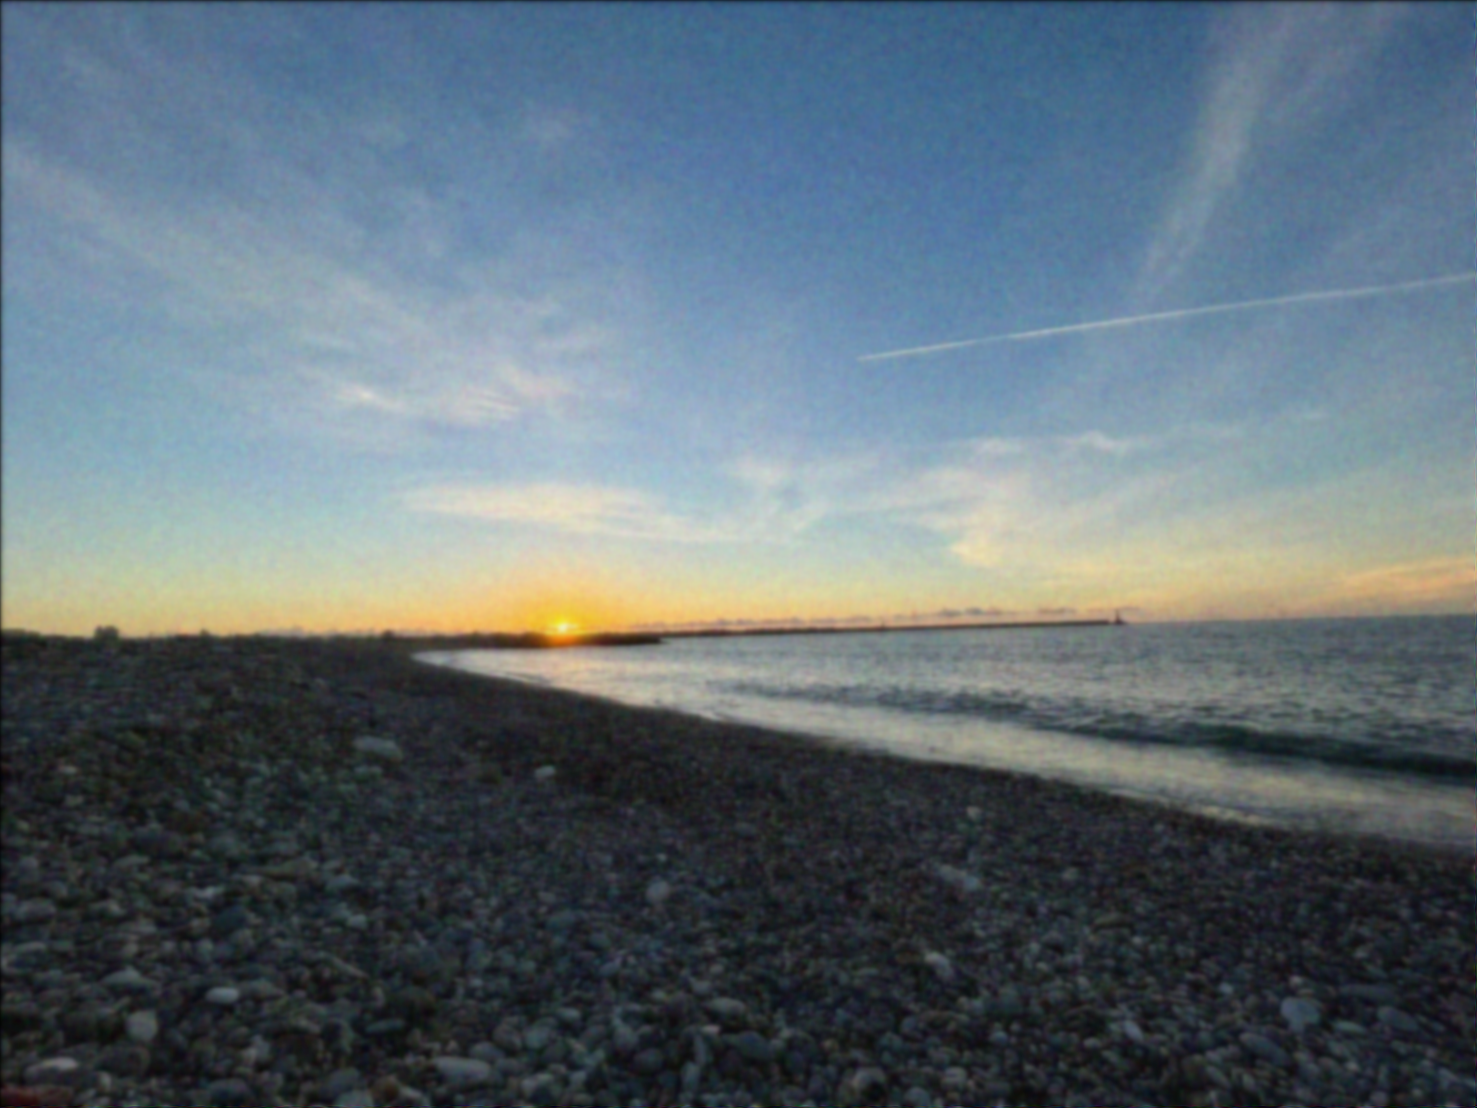

In [ ]:
#color correction
ga_img2 = gamma_correction(blur_img2)
cv2.imwrite('your_path', ga_img2)
cv2_imshow(ga_img)

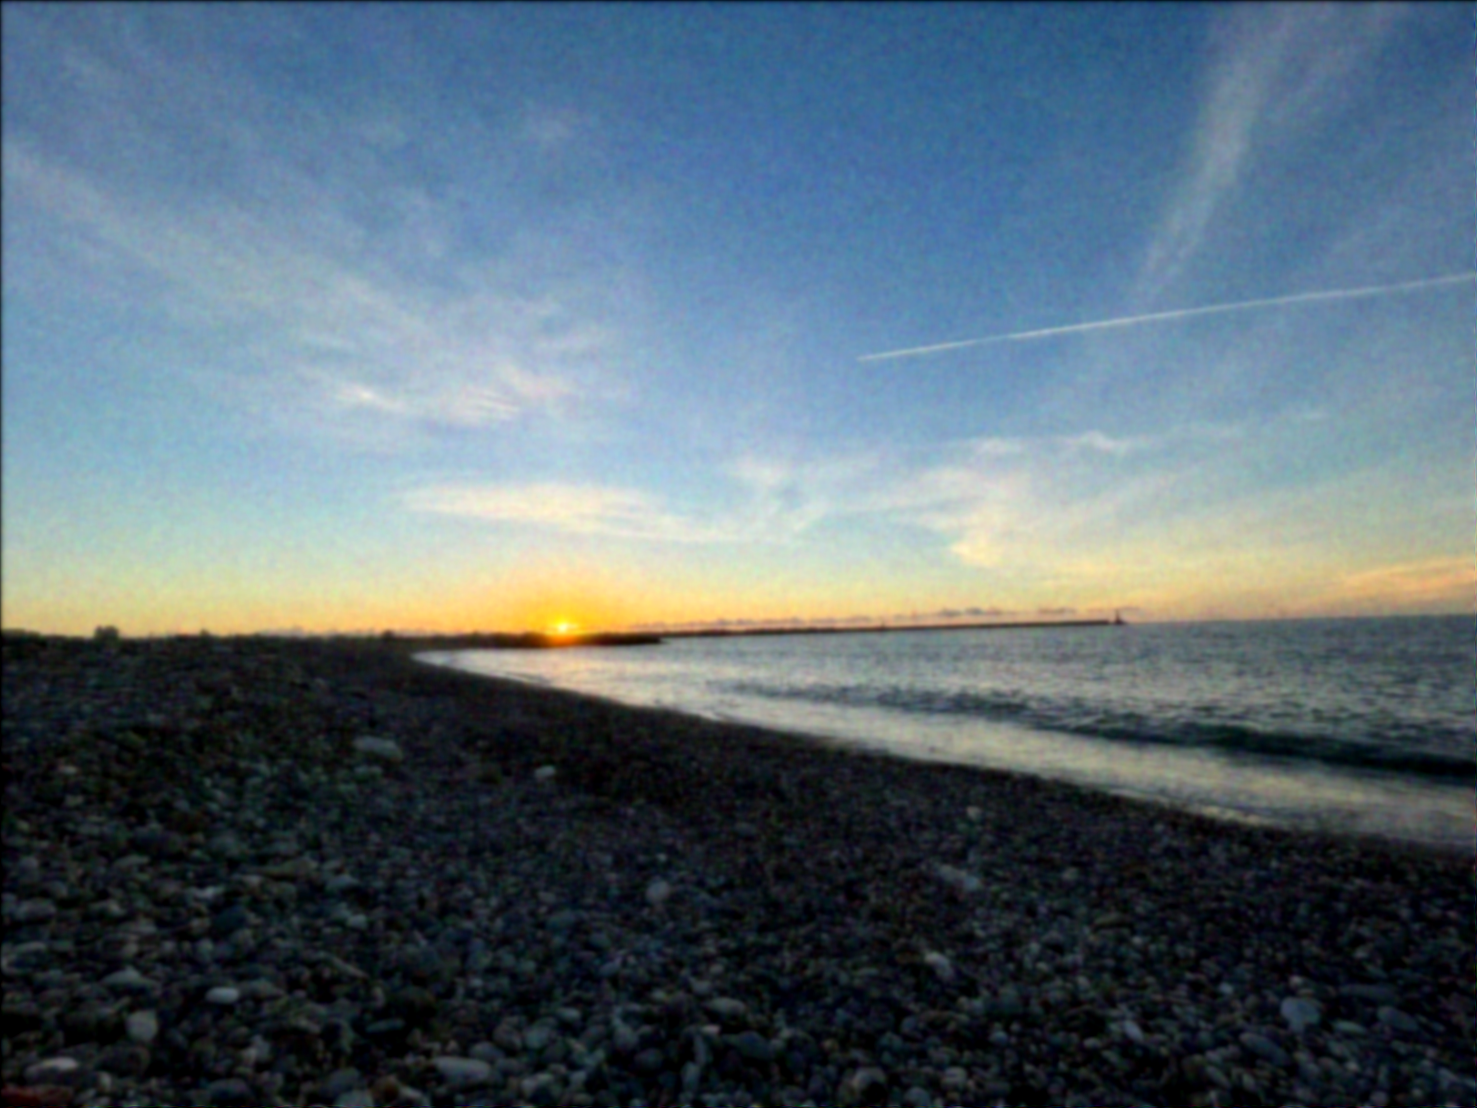

In [ ]:
#contrast adjustment
final_img = contrast_adjustment(blur_img)
final_img2 = ga_img2
cv2.imwrite('your_path', final_img)
cv2.imwrite('your_path', final_img2)
cv2_imshow(final_img)